# Teste Analise de Dados

**Instruções:**
* Descreva a abordagem utilizada na resolução.
* Trechos de códigos deverão ter comentários essenciais.
* Haverá sessão de dúvidas, direcionando o entendimento dos problemas. 

**Não haverá comentário de solução**

## 1) Estudo do desempenho da siderurgia brasileira

A indústria do aço possui grande importância na indústria de transformação brasileira, na participação do PIB e na geração de empregos. Segundo o IABr (Instituto Aço Brasil) a produção de aço bruto brasileiro atingiu 32,6 milhões de toneladas em 2019, colocando o Brasil como o 9º maior produtor de aço no mundo. Foram 112 mil colaboradores, entre próprios e terceiros, que tornaram esse resultado possível.

https://acobrasil.org.br/

---

O desempenho da indústria siderúrgica depende do desempenho econômico do país. E vemos isso refletido no consumo de aço interno.

Uma forma de avaliar o consumo de aço interno é através do consumo de aço aparente que é dado por

<b>Consumo Aparente = Produção de Aço + Importação de Aço - Exportação de Aço<b>


### Utilizando os dados históricos disponíveis no arquivo de excel "Performance_Mensal.xls" responda as seguintes pergutas e descreva o raciocínio utilizado.
---

# Imports

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from plotnine import *
from prophet import Prophet
from datetime import datetime
from dateutil.relativedelta import relativedelta

/home/leshiota/workspace/DesafioGerdau/venv/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
Importing plotly failed. Interactive plots will not work.


Os dados da planilha Performance_Mensal foram formatados conforme o arquivo "Tratamento_dados" e os dados foram dispostos em dois DataFrame:

df_quantidade: Dataframe demonstrando as quantidade das subcategorias por período.

df_imp_exp: Quantidade total de aço importado e exportado e seus respectivos valores.

In [3]:
## Importando o Dataframe
df_quantidade = pd.read_csv('../dados/Quantidade_subcategoria.csv',sep=',')
df_quantidade

,especificacao,categoria,subcategoria,trimestre,periodo,ano,mes,quantidade
0,Producao.Aco Bruto,Producao,Aco Bruto,1,Jan_2013,2013,Jan,2769.437
1,Producao.Planos,Producao,Planos,1,Jan_2013,2013,Jan,1202.482
2,Producao.Longos,Producao,Longos,1,Jan_2013,2013,Jan,848.959
3,Producao.Placas,Producao,Placas,1,Jan_2013,2013,Jan,394.660
4,Producao.Blocos,Producao,Blocos,1,Jan_2013,2013,Jan,75.711
...,...,...,...,...,...,...,...,...
2249,Importacao.Planos,Importacao,Planos,1,Fev_2021,2021,Fev,133.079
2250,Importacao.Longos,Importacao,Longos,1,Fev_2021,2021,Fev,102.509
2251,Importacao.Semiacabados p/ Venda,Importacao,Semiacabados p/ Venda,1,Fev_2021,2021,Fev,98.282
2252,Caparente.Planos,Caparente,Planos,1,Fev_2021,2021,Fev,1237.750


In [4]:
## Importando o Dataframe
df_imp_exp =  pd.read_csv('../dados/Importacao_exportacao.csv',sep=',')
df_imp_exp

,especificacao,categoria,subcategoria,trimestre,periodo,ano,mes,valor
0,Exportacao.Total(mil_t),Exportacao,Total(mil_t),1,Jan_2013,2013,Jan,932.857
1,Exportacao.milhoes(dolar),Exportacao,milhoes(dolar),1,Jan_2013,2013,Jan,573.500
2,Importacao.Total(mil_t),Importacao,Total(mil_t),1,Jan_2013,2013,Jan,278.849
3,Importacao.milhoes(dolar),Importacao,milhoes(dolar),1,Jan_2013,2013,Jan,369.978
4,Exportacao.Total(mil_t),Exportacao,Total(mil_t),1,Fev_2013,2013,Fev,815.327
...,...,...,...,...,...,...,...,...
387,Importacao.milhoes(dolar),Importacao,milhoes(dolar),1,Jan_2021,2021,Jan,288.068
388,Exportacao.Total(mil_t),Exportacao,Total(mil_t),1,Fev_2021,2021,Fev,765.572
389,Exportacao.milhoes(dolar),Exportacao,milhoes(dolar),1,Fev_2021,2021,Fev,522.292
390,Importacao.Total(mil_t),Importacao,Total(mil_t),1,Fev_2021,2021,Fev,333.870


### a. As exportações de aço brasileiras são representativas no mercado internacional, o Brasil foi o 12º maior exportador de produtos siderúrgicos em 2019. Qual foi o trimestre em que houve a maior exportação de aço? Qual foi o preço aproximado? É possivel identificar alguma relação entre preço e quantidade exportada?

In [5]:
## Trimestre com maior exportação de aço em 2019
df_fil = df_imp_exp[(df_imp_exp.ano == 2019) & (df_imp_exp.categoria =='Exportacao') 
                    & (df_imp_exp.subcategoria=='Total(mil_t)')]

df_tri = pd.DataFrame(df_fil.groupby(['trimestre'])['valor'].sum())

df_tri = df_tri.sort_values(by='valor',ascending=False)
print('O segundo trimestre teve maior número de exportação com:'+ ' ' + str(df_tri.iloc[0][0]) + ' ' + 'toneladas')

O segundo trimestre teve maior número de exportação com: 3398.041 toneladas


In [6]:
## Preço médio aproximado do aço em dolar/tonelada:
df_avg = df_imp_exp[(df_imp_exp.ano ==2019)&(df_imp_exp.categoria =='Exportacao')&(df_imp_exp.trimestre ==2)]

df_avg = pd.DataFrame(df_avg.groupby(['subcategoria'])['valor'].sum())

avg = ((df_avg.iloc[1]*1000000) / (df_avg.iloc[0]*1000)).round(3)
print('A média do preço do aço no segundo trimestre de 2019 foi:' + ' ' 'US$'+ str(avg[0]) + ' '+'por tonelada.')

A média do preço do aço no segundo trimestre de 2019 foi: US$606.699 por tonelada.


In [7]:
## Analisando a correlação entre quantidade exportada e preço médio
table = df_imp_exp.pivot_table('valor', index =['categoria', 'periodo', 'ano', 'mes','trimestre'], columns =['subcategoria'])

table_ren = table.rename_axis(None,axis=1)

table_ren = table_ren.reset_index()
table_ren['preco_medio(dolar/ton)'] = (table_ren['milhoes(dolar)']*1000000) / (table_ren['Total(mil_t)']*1000)
table_ren[['preco_medio(dolar/ton)','Total(mil_t)']].corr()

,preco_medio(dolar/ton),Total(mil_t)
preco_medio(dolar/ton),1.000000,-0.858076
Total(mil_t),-0.858076,1.000000


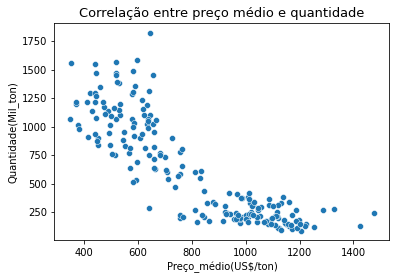

In [8]:
## Plotando a correlação entre preço médio e quantidade
ax = sns.scatterplot(data = table_ren, x="preco_medio(dolar/ton)", y="Total(mil_t)")
ax.set_title('Correlação entre preço médio e quantidade', size = 13)
ax.set_xlabel('Preço_médio(US$/ton)')
ax.set_ylabel('Quantidade(Mil_ton)')
ax;

Conclusão: No ano de 2019, o periodo com maior exportação foi o segundo trimestre com 3398.041 tonelas com o preço médio de  US$606.699 por tonelada.
Avaliando a correlação entre a quantidade exportada eo preço médio é possivel obervar que há uma correlação negativa exponencial entre as variáveis.  

### b. Dado que o desempenho da siderurgia está ligado ao desempenho econômico do país, utilize a série histórica do consumo aparente de aço brasileiro e faça uma análise exploratória, explicando as mudanças de tendência observadas.

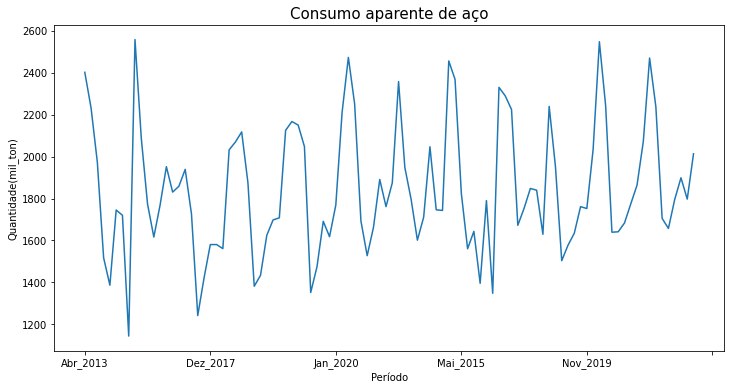

In [9]:
## Avaliando graficamente o consumo aparente ao longo do tempo
df_consumo = df_quantidade[df_quantidade['categoria']=='Caparente']
aparente = df_consumo.groupby(df_consumo['periodo'])['quantidade'].sum()

plt.figure(figsize = (12,6))
ap = aparente.plot()
ap.set_title('Consumo aparente de aço',size=15)
ap.set_ylabel('Quantidade(mil_ton)')
ap.set_xlabel('Período')
ap;

A análise exploratória utilizará a taxa de variação percentual do consumo aparente, onde a taxa de variação será calculado em relação ao mesmo trimestre do ano anterior. O período presente na planilha Performance_mensal é de Jan/2013 a Fev/2021, para realizar a análise os dados de Jan e Fev 2021 serão desconsiderados uma vez que não há dado suficiente do primeiro trimestre de 2021. Adicionalmente, não será possível calcular a taxa de variação de 2013 uma vez que não temos os dados de 2012.

In [10]:
## Adicionando a coluna de taxa de variação(%)
df_total = pd.DataFrame(df_consumo.groupby(['ano','trimestre'])['quantidade'].sum()).reset_index()
df_total.sort_values(by=['trimestre', 'ano'] , inplace = True)
df_ca= df_total.pivot_table('quantidade',index =['trimestre'], columns =['ano'])
df_ca = df_ca.rename_axis(None, axis=1)  
df_ca = df_ca.reset_index()
df_ca

,trimestre,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,1,6568.459,6558.520,6147.0,4404.0,4660.0,5163.0,5154.895,5106.005,4336.441
1,2,7218.077,6549.375,5594.0,4678.0,4740.0,5187.0,5255.915,4233.295,NaN
2,3,7503.751,6578.182,5171.0,4800.0,5226.0,5742.0,5388.851,5747.176,NaN
3,4,6727.671,5919.582,4383.0,4638.0,4897.0,5115.0,5176.894,6138.269,NaN


In [11]:
## Adicionando a coluna de taxa de variação(%)
x = 1
b = 0
while(x< len(df_ca.columns)-1 and b in range(0,7)):     
        lista_ano = [2014,2015,2016,2017,2018,2019,2020,2021]
        df_ca['var'+ '_'+ str(lista_ano[b])] = (df_ca[df_ca.columns[x+1]]/df_ca[df_ca.columns[x]]-1)*100
        b += 1
        x += 1
df_ca 

,trimestre,2013,2014,2015,2016,2017,2018,2019,2020,2021,var_2014,var_2015,var_2016,var_2017,var_2018,var_2019,var_2020
0,1,6568.459,6558.520,6147.0,4404.0,4660.0,5163.0,5154.895,5106.005,4336.441,-0.151314,-6.274586,-28.355295,5.812897,10.793991,-0.156982,-0.948419
1,2,7218.077,6549.375,5594.0,4678.0,4740.0,5187.0,5255.915,4233.295,NaN,-9.264268,-14.587270,-16.374687,1.325353,9.430380,1.328610,-19.456555
2,3,7503.751,6578.182,5171.0,4800.0,5226.0,5742.0,5388.851,5747.176,NaN,-12.334751,-21.391655,-7.174628,8.875000,9.873708,-6.150279,6.649377
3,4,6727.671,5919.582,4383.0,4638.0,4897.0,5115.0,5176.894,6138.269,NaN,-12.011423,-25.957610,5.817933,5.584304,4.451705,1.210049,18.570498


In [12]:
## Dropando as colunas ano
df_var = df_ca.drop(columns = [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])
df_var

,trimestre,var_2014,var_2015,var_2016,var_2017,var_2018,var_2019,var_2020
0,1,-0.151314,-6.274586,-28.355295,5.812897,10.793991,-0.156982,-0.948419
1,2,-9.264268,-14.587270,-16.374687,1.325353,9.430380,1.328610,-19.456555
2,3,-12.334751,-21.391655,-7.174628,8.875000,9.873708,-6.150279,6.649377
3,4,-12.011423,-25.957610,5.817933,5.584304,4.451705,1.210049,18.570498


In [13]:
## Transformando o dado de largo para longo:
df_var.rename({'var_2014':2014, 'var_2015':2015, 'var_2016':2016, 'var_2017':2017, 
               'var_2018':2018, 'var_2019':2019, 'var_2020':2020}, axis = 1, inplace=True)

lista = df_var.columns
lista = lista[1:8]
df_bd = pd.melt(df_var, id_vars=['trimestre'], value_vars=lista, var_name='ano', value_name='c_aparente')
df_bd

,trimestre,ano,c_aparente
0,1,2014,-0.151314
1,2,2014,-9.264268
2,3,2014,-12.334751
3,4,2014,-12.011423
4,1,2015,-6.274586
5,2,2015,-14.587270
6,3,2015,-21.391655
7,4,2015,-25.957610
8,1,2016,-28.355295
9,2,2016,-16.374687


Como comparativo do desenvolvimento do país no mesmo período será utilizado o PIB segundo o IBGE.

In [14]:
## Importando os dados do IBGE
df_pib = pd.read_excel('../dados/Variacao_PIB.xlsx')
df_pib

,trimestre,ano,ano_tri,PIB_pm
0,1.0,2014.0,2014_1,3.5
1,2.0,2014.0,2014_2,-0.4
2,3.0,2014.0,2014_3,-0.6
3,4.0,2014.0,2014_4,-0.2
4,1.0,2015.0,2015_1,-1.6
5,2.0,2015.0,2015_2,-2.7
6,3.0,2015.0,2015_3,-4.3
7,4.0,2015.0,2015_4,-5.5
8,1.0,2016.0,2016_1,-5.1
9,2.0,2016.0,2016_2,-3.2


In [15]:
## Juntando os DataFrames:
data = pd.merge(df_bd, df_pib, how="inner", on=["trimestre", "ano"])
data

,trimestre,ano,c_aparente,ano_tri,PIB_pm
0,1,2014,-0.151314,2014_1,3.5
1,2,2014,-9.264268,2014_2,-0.4
2,3,2014,-12.334751,2014_3,-0.6
3,4,2014,-12.011423,2014_4,-0.2
4,1,2015,-6.274586,2015_1,-1.6
5,2,2015,-14.587270,2015_2,-2.7
6,3,2015,-21.391655,2015_3,-4.3
7,4,2015,-25.957610,2015_4,-5.5
8,1,2016,-28.355295,2016_1,-5.1
9,2,2016,-16.374687,2016_2,-3.2


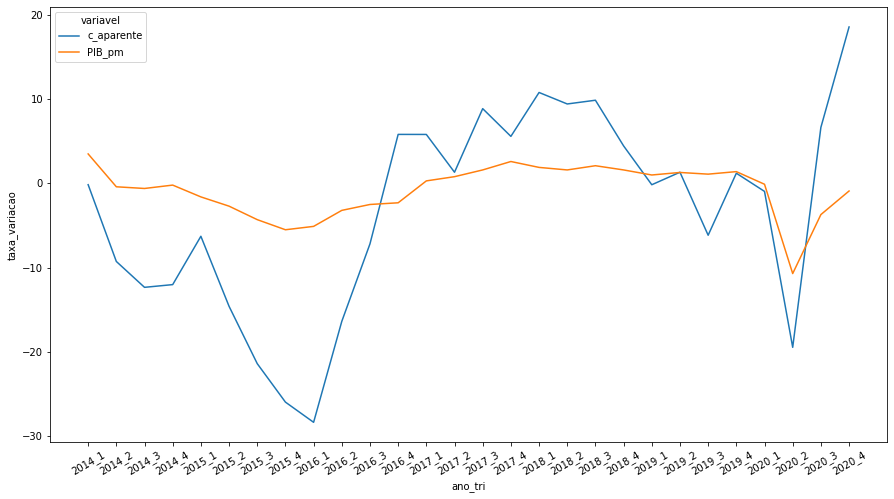

In [16]:
## Analisando as variaveis
pd_all = pd.melt(data, id_vars=['ano_tri'], value_vars=['c_aparente','PIB_pm'], 
                 var_name='variavel', value_name='taxa_variacao')

plt.figure(figsize = (15,8))
ax = sns.lineplot(data=pd_all, x="ano_tri", y="taxa_variacao", hue="variavel")
plt.xticks(rotation=30);

O PIB apresenta uma forte relação com o consumo aparente do aço. Houve duas quedas acentuadas do consumo do aço ao longo do período. Uma queda que se inciou em 2015 e começou a se recuperar em 2016 e outra queda no início de 2020.

Em 2015 o Brasil enfrentou uma crise econômica que causou uma quedo no PIB de 3,2% entre os meses de Janeiro a Setembro  adicionalmente, o país estava vivendo uma instabilidade política com os escandelos de corrupção da Petrobras e Lava-Jato e abertura do processo de Impeachment de Dilma Rousseff. Esses fatores podem ter contribuído para a queda do consumo do aço.
No final de 2019 e início do ano de 2020 houve o início da pandemia do Covid-19 o que pode ter causado a queda no consumo aparente do aço. 

### c. Projeções são importantes para avaliar situações futuras e realizar planejamentos. Faça uma projeção do consumo aparente de aço para os próximos 3 anos (2020 - 2022) e avalie quais fatores e/ou variáveis influenciam a projeção.

In [17]:
## Vendo o dataframe quantidade
df_quantidade.head()

,especificacao,categoria,subcategoria,trimestre,periodo,ano,mes,quantidade
0,Producao.Aco Bruto,Producao,Aco Bruto,1,Jan_2013,2013,Jan,2769.437
1,Producao.Planos,Producao,Planos,1,Jan_2013,2013,Jan,1202.482
2,Producao.Longos,Producao,Longos,1,Jan_2013,2013,Jan,848.959
3,Producao.Placas,Producao,Placas,1,Jan_2013,2013,Jan,394.660
4,Producao.Blocos,Producao,Blocos,1,Jan_2013,2013,Jan,75.711


In [18]:
## Filtrando a categoria 'Caparente' (Consumo aparente), criando a coluna 'ds' e renomeando a coluna 'quantidade'
df_forecast = df_quantidade[df_quantidade['categoria']=='Caparente'].groupby(['categoria','periodo'])['quantidade'].sum().reset_index()
mes = []
ano = []
for per in df_forecast['periodo']:
    periodo = per.split('_')
    mes.append(periodo[0])
    ano.append(periodo[1])   
df_forecast['ano'] = ano
df_forecast['mes'] = mes

map_mes = {
    "Jan": 1,
    "Fev": 2,
    "Mar": 3,
    "Abr": 4,
    "Mai": 5,
    "Jun": 6,
    "Jul": 7,
    "Ago": 8,
    "Set": 9,
    "Out": 10,
    "Nov": 11,
    "Dez": 12
}
df_forecast['mes_num'] = df_forecast['mes'].map(map_mes)
df_forecast['ds'] = df_forecast['ano'].astype(str)+'-'+df_forecast['mes_num'].astype(str)
df_forecast = df_forecast[['ds', 'quantidade']]
df_forecast['ds'] =  pd.to_datetime(df_forecast['ds'], format='%Y-%m')
df_forecast.rename({'quantidade': 'y'}, axis=1, inplace=True)
df_forecast = df_forecast.sort_values(by="ds")

In [19]:
## Analisando o dataframe forecast
df_forecast.tail()

,ds,y
89,2020-10-01,2072.571
81,2020-11-01,2033.502
23,2020-12-01,2032.196
41,2021-01-01,2211.070
32,2021-02-01,2125.371


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/leshiota/workspace/DesafioGerdau/venv/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Initial log joint probability = -105.585
Iteration  1. Log joint probability =    84.4332. Improved by 190.018.
Iteration  2. Log joint probability =    137.812. Improved by 53.3784.
Iteration  3. Log joint probability =    138.323. Improved by 0.511521.
Iteration  4. Log joint probability =    179.197. Improved by 40.8733.
Iteration  5. Log joint probability =    179.207. Improved by 0.010804.
Iteration  6. Log joint probability =    179.469. Improved by 0.261974.
Iteration  7. Log joint probability =     179.56. Improved by 0.09082.
Iteration  8. Log joint probability =     179.76. Improved by 0.200033.
Iteration  9. Log joint probability =    179.773. Improved by 0.0126562.
Iteration 10. Log joint probability =    179.863. Improved by 0.090455.
Iteration 11. Log joint probability =    179.904. Improved by 0.0410216.
Iteration 12. Log joint probability =    180.029. Improved by 0.124982.
Iteration 13. Log joint probability =    180.142. Improved by 0.112798.
Iteration 14. Log joint 

/home/leshiota/workspace/DesafioGerdau/venv/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/home/leshiota/workspace/DesafioGerdau/venv/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


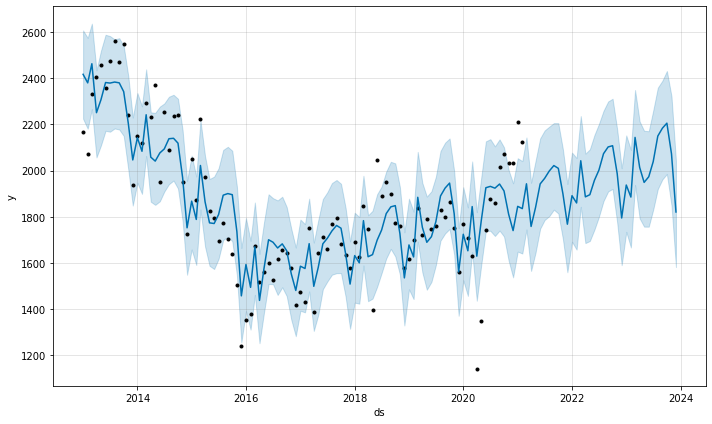

In [20]:
## Utilizando a bibloteca Prophet para realizar o forecast 
m = Prophet().fit(df_forecast)
future = m.make_future_dataframe(periods=34, freq='MS')
fcst = m.predict(future)
fig = m.plot(fcst)

In [21]:
## Dataframe do previsto com a data, média, intervalo de confiança inferior e intervalo de confiança superior
df_previsto = fcst[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
df_previsto.tail()

,ds,yhat,yhat_lower,yhat_upper
127,2023-08-01,2149.118001,1919.935688,2358.283372
128,2023-09-01,2183.225699,1961.700176,2388.766013
129,2023-10-01,2204.778544,1984.925248,2430.538780
130,2023-11-01,2072.039000,1849.064755,2321.342215
131,2023-12-01,1820.514581,1582.089687,2041.584928


/home/leshiota/workspace/DesafioGerdau/venv/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


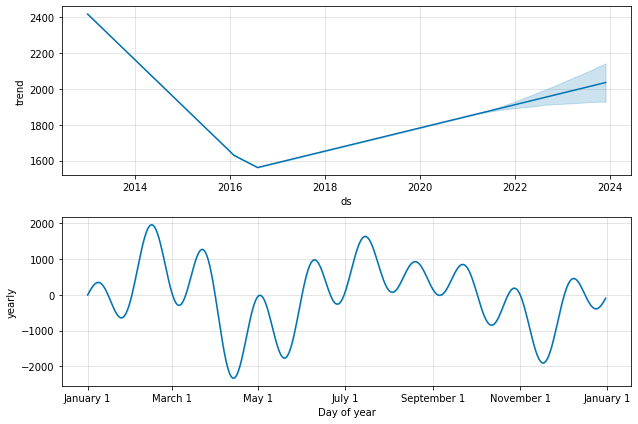

In [23]:
## Realizando a decomposicao
fig2 = m.plot_components(fcst)

In [24]:
## Crossvalidation 
from prophet.diagnostics import cross_validation
cutoffs = pd.date_range(start='2018-01-01', end='2020-01-01', freq='12MS')
df_cv = cross_validation(model=m, horizon='365 days', cutoffs=cutoffs)

  0%|                                                                         | 0/3 [00:00<?, ?it/s]/home/leshiota/workspace/DesafioGerdau/venv/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Initial log joint probability = -70.5176
Iteration  1. Log joint probability =    28.5042. Improved by 99.0218.
Iteration  2. Log joint probability =    75.3403. Improved by 46.8362.
Iteration  3. Log joint probability =    75.4107. Improved by 0.0704228.
Iteration  4. Log joint probability =    75.4605. Improved by 0.0497461.
Iteration  5. Log joint probability =    75.4844. Improved by 0.0238736.
Iteration  6. Log joint probability =    75.5738. Improved by 0.0894671.
Iteration  7. Log joint probability =    75.6262. Improved by 0.0524171.
Iteration  8. Log joint probability =    75.6522. Improved by 0.0259273.
Iteration  9. Log joint probability =    75.7198. Improved by 0.0676611.
Iteration 10. Log joint probability =    75.7478. Improved by 0.0279783.
Iteration 11. Log joint probability =    99.7168. Improved by 23.969.
Iteration 12. Log joint probability =    99.7508. Improved by 0.033981.
Iteration 13. Log joint probability =    99.7827. Improved by 0.0318827.
Iteration 14. Log

/home/leshiota/workspace/DesafioGerdau/venv/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/home/leshiota/workspace/DesafioGerdau/venv/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 33%|█████████████████████▋                                           | 1/3 [00:02<00:04,  2.04s/it]/home/leshiota/workspace/DesafioGerdau/venv/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Initial log joint probability = -81.5946
Iteration  1. Log joint probability =    52.2379. Improved by 133.833.
Iteration  2. Log joint probability =     125.48. Improved by 73.2419.
Iteration  3. Log joint probability =    125.516. Improved by 0.0358875.
Iteration  4. Log joint probability =     125.55. Improved by 0.0340015.
Iteration  5. Log joint probability =    140.393. Improved by 14.8434.
Iteration  6. Log joint probability =    140.407. Improved by 0.0137036.
Iteration  7. Log joint probability =    140.519. Improved by 0.112251.
Iteration  8. Log joint probability =    140.667. Improved by 0.147702.
Iteration  9. Log joint probability =      140.7. Improved by 0.0335455.
Iteration 10. Log joint probability =    140.706. Improved by 0.00550235.
Iteration 11. Log joint probability =    140.773. Improved by 0.0671514.
Iteration 12. Log joint probability =    140.819. Improved by 0.045799.
Iteration 13. Log joint probability =    140.834. Improved by 0.0151786.
Iteration 14. Log

/home/leshiota/workspace/DesafioGerdau/venv/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/home/leshiota/workspace/DesafioGerdau/venv/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 67%|███████████████████████████████████████████▎                     | 2/3 [00:04<00:02,  2.09s/it]/home/leshiota/workspace/DesafioGerdau/venv/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Initial log joint probability = -92.7906
Iteration  1. Log joint probability =    96.0323. Improved by 188.823.
Iteration  2. Log joint probability =    143.112. Improved by 47.0799.
Iteration  3. Log joint probability =    165.158. Improved by 22.0463.
Iteration  4. Log joint probability =    166.683. Improved by 1.5249.
Iteration  5. Log joint probability =      166.7. Improved by 0.016633.
Iteration  6. Log joint probability =    166.832. Improved by 0.131666.
Iteration  7. Log joint probability =    168.837. Improved by 2.00502.
Iteration  8. Log joint probability =    169.235. Improved by 0.398124.
Iteration  9. Log joint probability =    170.983. Improved by 1.74865.
Iteration 10. Log joint probability =    171.755. Improved by 0.771805.
Iteration 11. Log joint probability =    172.018. Improved by 0.262497.
Iteration 12. Log joint probability =    179.312. Improved by 7.29403.
Iteration 13. Log joint probability =    183.884. Improved by 4.5726.
Iteration 14. Log joint probabil

/home/leshiota/workspace/DesafioGerdau/venv/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/home/leshiota/workspace/DesafioGerdau/venv/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
100%|█████████████████████████████████████████████████████████████████| 3/3 [00:06<00:00,  2.29s/it]


In [26]:
## Calculando as metricas da crossvalidation
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head(10)

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,31 days,10551.699340,102.721465,89.106326,0.053839,0.047120,0.055886,0.666667
1,59 days,9068.973995,95.231161,88.247554,0.049718,0.047120,0.049992,0.888889
2,60 days,31317.568362,176.967704,151.220194,0.088658,0.061221,0.083777,0.666667
3,90 days,31832.453094,178.416516,156.266789,0.093593,0.055253,0.089155,0.666667
4,91 days,144396.699213,379.995657,278.324489,0.224568,0.055253,0.183303,0.666667
5,120 days,173633.778737,416.693867,346.392346,0.278056,0.226247,0.229427,0.333333
6,121 days,136193.327685,369.043802,315.044395,0.226303,0.226247,0.195897,0.333333
7,151 days,162477.861383,403.085427,347.982324,0.218473,0.207213,0.203119,0.333333
8,152 days,70802.206737,266.086841,220.017341,0.114161,0.095391,0.120437,0.333333
9,181 days,24892.548681,157.773726,155.967282,0.086568,0.094438,0.085894,0.333333


Conclusão: a previsão mostra um crescimento do consumo aparente do aço para os anos de 2021 a 2023. O modelo parece bem ajustado para o período que foi treinado. Os pontos que houve uma variação muito alta do consumo, o modelo não foi capaz de se ajustar, porém o modelo obteve um baixo erro percentual absoluto médio calculado pelo crossvalidation demonstrando uma boa acurácia. 

## 2) Conhecimento Geral

Baseado nos dados (carteira_demanda.xls) fornecidos da carteira da GSP do dia 25 de março, construa os seguintes gráficos com as bibliotecas da sua preferência (seaborn, matplotlib, Altair, etc). Tente se aproximar o máximo possível a descrição fornecida na imagem

#### Carteira por tipo de demanda

A GSP atende as seguintes demanda:
* Comercial Gerdau
* Corte e Dobra
* Produção para Estoque
* Mercado Externo
* Mercado Interno
* Planta/Transferência

Precisamos criar um gráfico que mostre os volumes da nossa carteira para cada mês e para cada tipo de demanda, além de ter a visão se a carteira foi predita ou ela já está implantada.

Faça uma breve descrição do gráfico e explique os filtros/tratamento nos dados

In [29]:
## Importando a base de dados
df_carteira = pd.read_excel('../dados/carteira_demanda.xls')
df_carteira

,abc_curve,client_id,client_name,confirmed_date,demand_type,document_id,document_item,due_month,fevor,make_to,...,plant_id,postponed_date,predicted,product_type,promised_date,quantity_old,quantity,sales_organization,material_aggregation,component_material_type
0,NaN,4416,4416,2021-03-24,Comercial Gerdau,4513942120,10,M0,251,MTS,...,1407,NaT,False,ACABADO,2021-05-28,1232000.0,1232.000,BRTR,RETO_10MM_INTERNAL_LCT_160,TARUGO_LCT_160
1,NaN,4416,4416,2021-03-24,Comercial Gerdau,4514028107,10,M0,251,MTS,...,1407,NaT,False,ACABADO,2021-06-26,524000.0,524.000,BRTR,"RETO_6,3MM_INTERNAL_LCT_160",TARUGO_LCT_160
2,NaN,4416,4416,2021-03-23,Comercial Gerdau,4514085943,10,M0,251,MTS,...,1407,NaT,False,ACABADO,2021-04-02,300000.0,300.000,BRTR,"RETO_12,5MM_INTERNAL_LCT_160",TARUGO_LCT_160
3,NaN,100199230,EMPRESA CONCESSIONARIA DE RODOVI,2021-01-25,Mercado Interno,10164961,30,M0,251,MTS,...,1407,NaT,False,ACABADO,2021-05-14,228957.0,228.957,BRCC,RETO_20MM_INTERNAL_LCT_160,TARUGO_LCT_160
4,NaN,100240094,GERDAU LAISA S A,2021-03-31,Mercado Externo,10337836,1,M0,251,MTO,...,1407,NaT,False,ACABADO,2021-05-15,199936.0,199.936,BREX,"CARRETEL_12,5MM_EXPORT_LCT_160",TARUGO_LCT_160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11825,NaN,100202740,PRE FABRICAR CONSTRUCOES LTDA,2021-12-10,Mercado Interno,9507847,80,M9,251,MTS,...,1407,2021-12-10,False,ACABADO,2021-12-10,25000.0,25.000,BRCC,CARRETEL_20MM_INTERNAL_LCT_160,TARUGO_LCT_160
11826,A,100202740,PRE FABRICAR CONSTRUCOES LTDA,2021-12-10,Mercado Interno,9507847,70,M9,251,MTS,...,1407,2021-12-10,False,ACABADO,2021-12-10,25000.0,25.000,BRCC,CARRETEL_20MM_INTERNAL_LCT_160,TARUGO_LCT_160
11827,NaN,100202740,PRE FABRICAR CONSTRUCOES LTDA,2021-12-10,Mercado Interno,9507847,40,M9,251,MTS,...,1407,2021-12-10,False,ACABADO,2021-12-10,21875.0,21.875,BRCC,CARRETEL_10MM_INTERNAL_LCT_160,TARUGO_LCT_160
11828,NaN,100202740,PRE FABRICAR CONSTRUCOES LTDA,2021-12-10,Mercado Interno,9507847,10,M9,251,MTS,...,1407,2021-12-10,False,ACABADO,2021-12-10,20448.0,20.448,BRCC,"CARRETEL_6,3MM_INTERNAL_LCT_160",TARUGO_LCT_160


In [30]:
## Selecionando as colunas que serão utilizadas
df_gps = df_carteira[['demand_type', 'due_month','predicted','quantity']]
df_gps

,demand_type,due_month,predicted,quantity
0,Comercial Gerdau,M0,False,1232.000
1,Comercial Gerdau,M0,False,524.000
2,Comercial Gerdau,M0,False,300.000
3,Mercado Interno,M0,False,228.957
4,Mercado Externo,M0,False,199.936
...,...,...,...,...
11825,Mercado Interno,M9,False,25.000
11826,Mercado Interno,M9,False,25.000
11827,Mercado Interno,M9,False,21.875
11828,Mercado Interno,M9,False,20.448


In [33]:
## Verificando se há valores nulos
df_gps.isnull().values.any()

False

In [34]:
## Agrupando os dados por tipo de demanda, mês e previsão
df_carteira_gps = pd.DataFrame(df_gps.groupby(['demand_type', 'due_month','predicted'])['quantity'].sum()).reset_index()
df_carteira_gps

,demand_type,due_month,predicted,quantity
0,Comercial Gerdau,M0,False,7200.091000
1,Comercial Gerdau,M1,False,1207.819000
2,Comercial Gerdau,M1,True,376.484326
3,Comercial Gerdau,M2,False,972.996000
4,Comercial Gerdau,M2,True,442.114310
5,Comercial Gerdau,M3,True,552.429777
6,Comercial Gerdau,M4,False,6.000000
7,Comercial Gerdau,M4,True,498.592531
8,Comercial Gerdau,M5,True,509.874086
9,Corte e Dobra,M0,False,10153.431000


/tmp/ipykernel_35063/34157312.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/leshiota/workspace/DesafioGerdau/venv/lib/python3.8/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


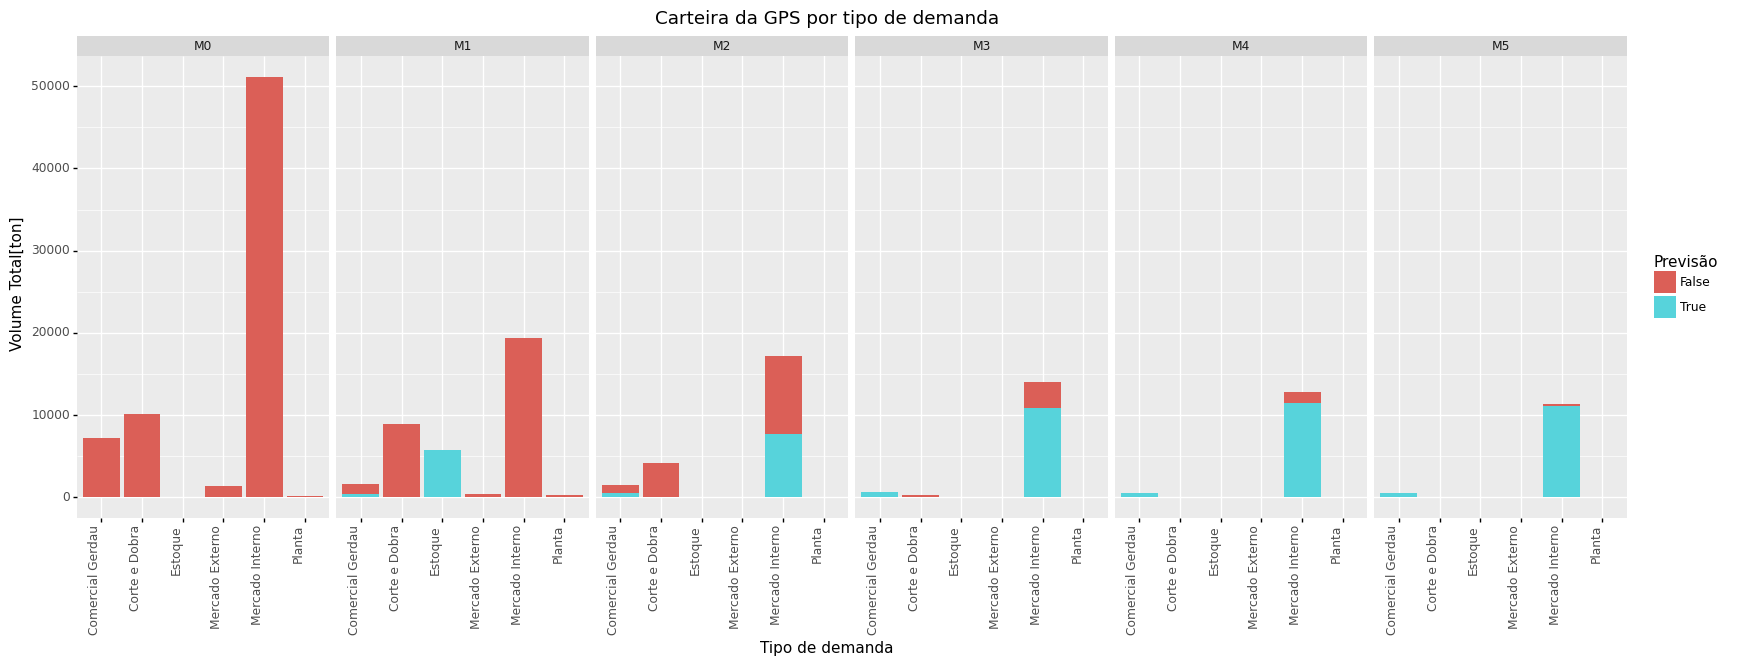

<ggplot: (8772538453050)>

In [37]:
## Plotando o gráfico para os meses M0 a M5
temp = df_carteira_gps[df_carteira_gps['due_month'].isin(['M0','M1','M2','M3','M4','M5'])]
temp.rename({'predicted':'Previsão'},axis=1,inplace=True)

(ggplot(temp, aes(x='demand_type', y='quantity', fill='Previsão'))
 + geom_bar(stat='identity', position='stack')
 + facet_wrap('due_month', ncol=6)
 + theme(figure_size = (20,6), axis_text_x=element_text(rotation=90, hjust=1))
 + labs(title ='Carteira da GPS por tipo de demanda', y = "Volume Total[ton]", x="Tipo de demanda")
)


Conclusão: O gráfico demonstra que para os meses M3, M4 e M5 a carteira foi predominantemente preditiva.